<a href="https://colab.research.google.com/github/dkmishra2407/github-session/blob/main/assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Data preparation:
# Download heart dataset from following link.
# https://www.kaggle.com/zhaoyingzhu/heartcsv
# Perform following operation on given dataset.
# a)
# Find Shape of Data
# b)
# Find Missing Values
# c)
# Find data type of each column
# d)
# Finding out Zero's
# e)
# Find Mean age of patients
# f)
# Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training
# (75%) and testing (25%).
# Through the diagnosis test Idf = pd.read_csv('') predicted 100 report as COVID positive, but only 45 of those were
# actually positive. Total 50 people in my sample were actually COVID positive. I have total 500
# samples.
# Create confusion matrix based on above data and find
# I. Accuracy
# II. Precision
# III. Recall
# IV. F-1 score



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/heartcsv/Heart.csv')

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df.shape

(303, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
df['Sex'].value_counts()

Sex
1    206
0     97
Name: count, dtype: int64

In [ ]:
df['Age'].mean()

54.43894389438944

In [ ]:
df_cols = df.filter(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol'])
df_target_col = df.filter(['AHD'])

In [ ]:
df_cols

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


<ipython-input-57-c8e06f8b71fa>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




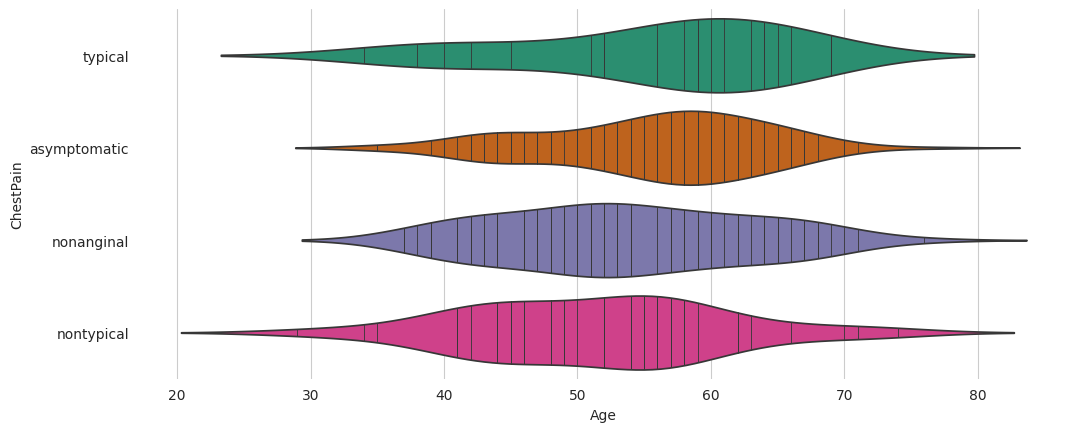

In [ ]:
# @title ChestPain vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_cols['ChestPain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_cols, x='Age', y='ChestPain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:

#   DIVIDING THE DATASET
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df_cols,test_size=0.25,random_state=42)
#train_target_set,test_target_set = train_test_split()


In [ ]:
train_set.shape

(227, 5)

In [ ]:
test_set.shape

(76, 5)

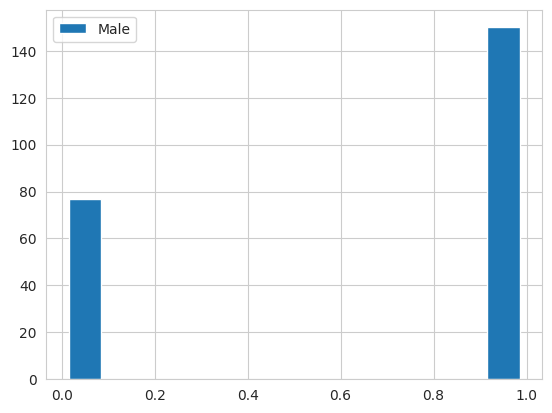

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(train_set['Sex'], rwidth=0.7, label=['Male', 'Female'])

# Add a legend with customizations
plt.legend()

# Show the plot
plt.show()

In [ ]:
train_set['Sex'].value_counts()

Sex
1    150
0     77
Name: count, dtype: int64

In [ ]:
numeric_col = train_set.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numeric_col

['Age', 'Sex', 'RestBP', 'Chol']

In [ ]:
cata_col = df.select_dtypes('object').columns.tolist()

In [ ]:
cata_col

['ChestPain', 'Thal', 'AHD']

In [ ]:
import plotly.express as px
fig = px.histogram(train_set,
                   x='Age',
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.histogram(train_set,
                   x='Sex',
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Heart Disease')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(train_set,x="RestBP",marginal='box',)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:

fig = px.histogram(train_set,x="ChestPain",marginal='box',)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:


px.histogram(train_set, x='Sex', color='Sex', title='AGES', barmode='group')

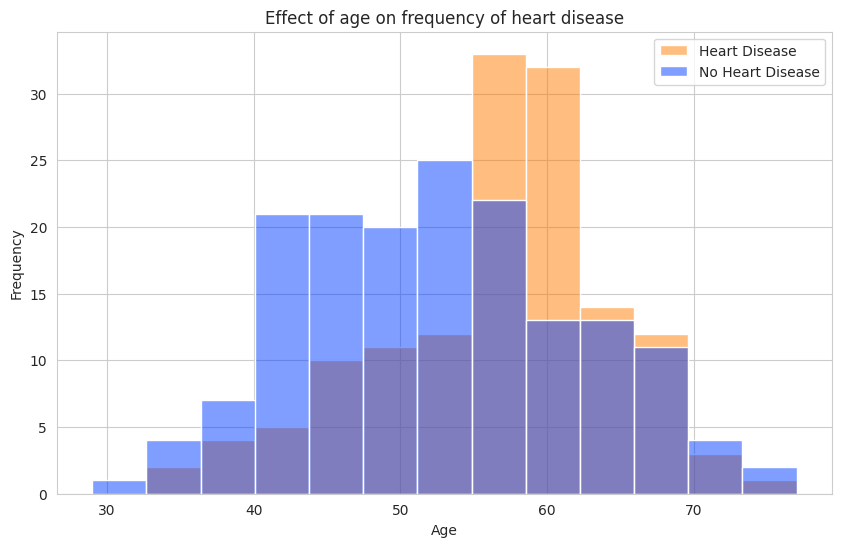

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.histplot(x="Age", data=df, hue="AHD", palette="bright")
sns.set_style("whitegrid")
plt.title("Effect of age on frequency of heart disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["Heart Disease","No Heart Disease"])
plt.show()

In [ ]:
#K-FOLD
# the data set is divided into a number of K-folds and
# used to assess the model's ability as new data become available.

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC


In [ ]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
df_target_col

,AHD
0,No
1,Yes
2,Yes
3,No
4,No
...,...
298,Yes
299,Yes
300,Yes
301,Yes


In [ ]:
# Convert 'Response' column to numerical values
df['Numeric Value'] = df['AHD'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Numeric Value']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Numeric Value, Length: 303, dtype: int64

In [ ]:
df_cols

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [ ]:
df_target_cols = df[['Age', 'Sex', 'RestBP', 'Chol', 'ExAng', 'MaxHR', 'Fbs','Slope']]


In [ ]:
df_target_cols

,Age,Sex,RestBP,Chol,ExAng,MaxHR,Fbs,Slope
0,63,1,145,233,0,150,1,3
1,67,1,160,286,1,108,0,2
2,67,1,120,229,1,129,0,2
3,37,1,130,250,0,187,0,3
4,41,0,130,204,0,172,0,1
...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,2
299,68,1,144,193,0,141,1,2
300,57,1,130,131,1,115,0,2
301,57,0,130,236,0,174,0,2


In [ ]:
df_target_cols.describe()

,Age,Sex,RestBP,Chol,ExAng,MaxHR,Fbs,Slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.326733,149.607261,0.148515,1.600660
std,9.038662,0.467299,17.599748,51.776918,0.469794,22.875003,0.356198,0.616226
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,1.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,153.000000,0.000000,2.000000
75%,61.000000,1.000000,140.000000,275.000000,1.000000,166.000000,0.000000,2.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,3.000000


In [ ]:
svm_classifier = SVC(kernel='linear')
cross_val_results = cross_val_score(svm_classifier, df_target_cols,df['Numeric Value'], cv=kf)

In [ ]:
cross_val_results.shape

(5,)

In [ ]:
cross_val_results.mean()

0.765464480874317

In [ ]:
cross_val_results

array([0.78688525, 0.73770492, 0.83606557, 0.71666667, 0.75      ])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
categorical_columns

['ChestPain', 'Thal', 'AHD']

In [ ]:
categorical_columns = ['ChestPain']

In [ ]:

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
one_hot_encoded_df + df_target_cols

,0,1,2,3,Age,Chol,ExAng,Fbs,MaxHR,RestBP,Sex,Slope
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_target

[     Age  Sex  RestBP  Chol  ExAng  MaxHR  Fbs  Slope
 0     63    1     145   233      0    150    1      3
 1     67    1     160   286      1    108    0      2
 2     67    1     120   229      1    129    0      2
 3     37    1     130   250      0    187    0      3
 4     41    0     130   204      0    172    0      1
 ..   ...  ...     ...   ...    ...    ...  ...    ...
 298   45    1     110   264      0    132    0      2
 299   68    1     144   193      0    141    1      2
 300   57    1     130   131      1    115    0      2
 301   57    0     130   236      0    174    0      2
 302   38    1     138   175      0    173    0      1
 
 [303 rows x 8 columns],
 array([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]])]

In [ ]:
svm_classifier = SVC(kernel='linear')
cross_val_results = cross_val_score(svm_classifier, final_target,df['Numeric Value'], cv=kf)

ValueError: Found input variables with inconsistent numbers of samples: [2, 303]